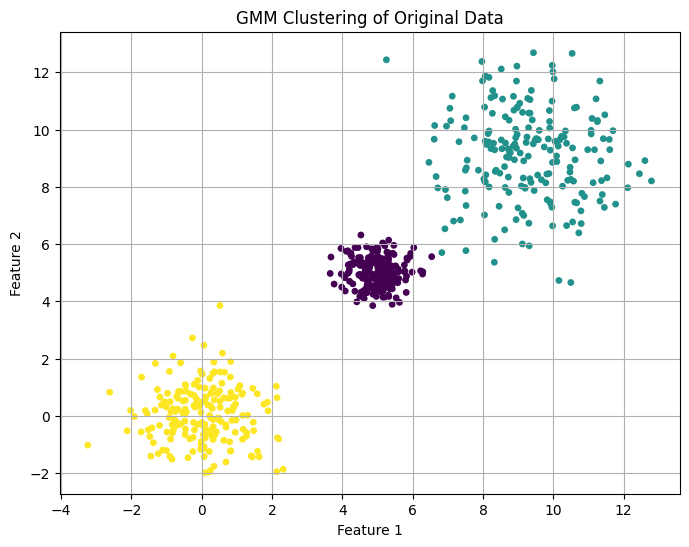

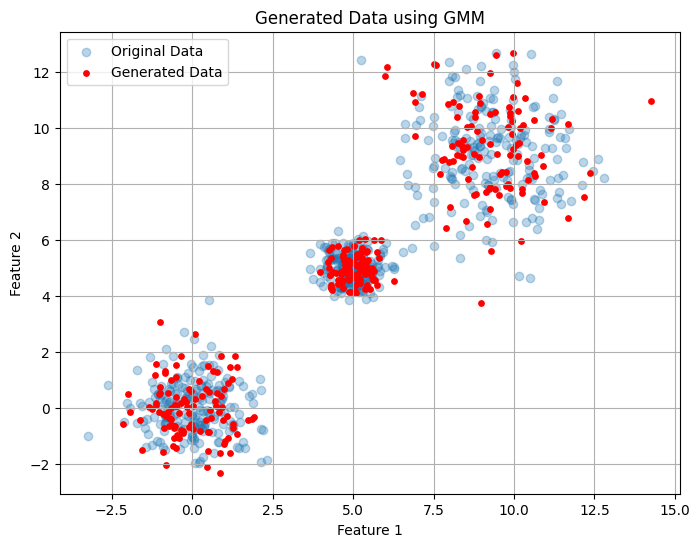

📌 Gaussian Mixture Model Parameters:

🔹 Means (centers of Gaussians):
[[4.96933277e+00 4.99186437e+00]
 [9.29718610e+00 9.09164173e+00]
 [6.34223627e-03 3.87549883e-02]]

🔹 Covariance Matrices (shape + spread):
Component 1:
[[ 0.25465221 -0.00572121]
 [-0.00572121  0.25097425]]

Component 2:
[[ 1.88856353 -0.1390319 ]
 [-0.1390319   2.52517665]]

Component 3:
[[ 0.91279493 -0.0259499 ]
 [-0.0259499   0.92644062]]

🔹 Weights (mixing proportions):
[0.33315703 0.33350964 0.33333333]


In [2]:
# ✅ Step 1: Install and Import Required Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# ✅ Step 2: Generate Synthetic Dataset (3 Gaussians)
np.random.seed(42)
data1 = np.random.normal(loc=0, scale=1, size=(200, 2))
data2 = np.random.normal(loc=5, scale=0.5, size=(200, 2))
data3 = np.random.normal(loc=9, scale=1.5, size=(200, 2))

X = np.vstack((data1, data2, data3))

# ✅ Step 3: Fit the GMM Model
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42)
gmm.fit(X)
labels = gmm.predict(X)

# ✅ Step 4: Visualize Clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=15)
plt.title("GMM Clustering of Original Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

# ✅ Step 5: Generate New Samples
new_samples, _ = gmm.sample(300)

# ✅ Step 6: Visualize Generated vs Original
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], alpha=0.3, label='Original Data')
plt.scatter(new_samples[:, 0], new_samples[:, 1], color='red', s=15, label='Generated Data')
plt.title("Generated Data using GMM")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

# ✅ Step 7: Print Mean, Covariance, and Weights of GMM
print("📌 Gaussian Mixture Model Parameters:")
print("\n🔹 Means (centers of Gaussians):")
print(gmm.means_)

print("\n🔹 Covariance Matrices (shape + spread):")
for i, cov in enumerate(gmm.covariances_):
    print(f"Component {i+1}:\n{cov}\n")

print("🔹 Weights (mixing proportions):")
print(gmm.weights_)


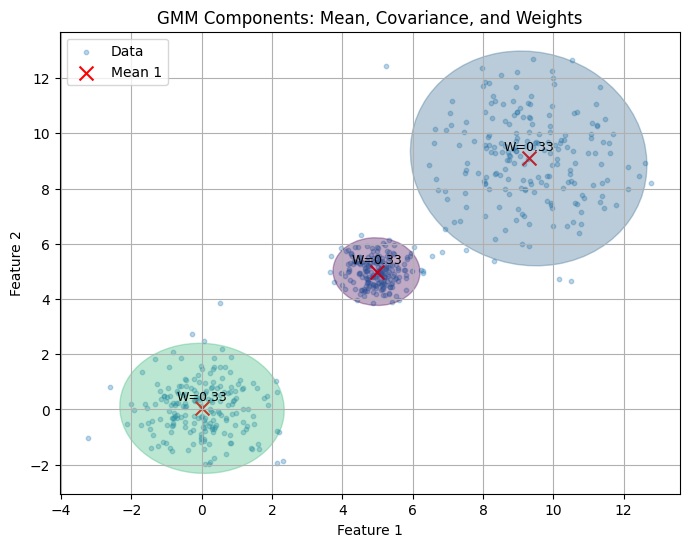

In [3]:
import matplotlib as mpl
from matplotlib.patches import Ellipse

def plot_gmm_with_ellipses(gmm, X, ax=None, colors='viridis'):
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 6))

    ax.scatter(X[:, 0], X[:, 1], s=10, alpha=0.3, label='Data')

    # Get colors from cmap
    cmap = plt.get_cmap(colors)
    for i, (mean, cov, weight) in enumerate(zip(gmm.means_, gmm.covariances_, gmm.weights_)):
        # Plot mean
        ax.scatter(mean[0], mean[1], c='red', marker='x', s=100, label=f'Mean {i+1}' if i == 0 else None)

        # Compute ellipse from covariance
        v, w = np.linalg.eigh(cov)
        v = 2.0 * np.sqrt(5.991 * v)  # 95% confidence ellipse
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0]) * 180.0 / np.pi

        ell = Ellipse(mean, v[0], v[1], angle=angle, alpha=weight, color=cmap(i / gmm.n_components))
        ax.add_patch(ell)

        # Annotate with weight
        ax.text(mean[0], mean[1]+0.3, f'W={weight:.2f}', color='black', fontsize=9, ha='center')

    ax.set_title("GMM Components: Mean, Covariance, and Weights")
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    ax.grid(True)
    ax.legend()
    plt.show()

# 🔥 Call the function
plot_gmm_with_ellipses(gmm, X)
